In [1]:
!pip install keybert

In [2]:
!pip install wordcloud

In [3]:
!pip install tqdm

In [4]:
import pandas as pd
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
import keybert

In [5]:
Comments_After = pd.read_csv('Popular_Comments_After.csv')
Comments_Before = pd.read_csv('Popular_Comments_Before.csv')

In [6]:

model = keybert.KeyBERT()

In [7]:
keywords_list = []
for row_i in tqdm(range(Comments_Before.shape[0])):
    row = Comments_Before.iloc[row_i]
    keywords = []
    title_abstract = row['text'] 
    keywords.append(model.extract_keywords(title_abstract,
                       keyphrase_ngram_range = (1,1)))
    keywords.append(model.extract_keywords(title_abstract,
                       keyphrase_ngram_range = (1,2)))
    keywords_list.append(keywords)

  0%|          | 0/100 [00:00<?, ?it/s]

In [36]:
Comments_Before['keywords'] = keywords_list

In [37]:
Comments_Before

,Unnamed: 0.1,Unnamed: 0,videoId,author,publishedAt,likeCount,text,period,keywords
0,0,44,bQNsHivR9AU,@jochenkrebs9685,2022-10-20T19:19:36Z,7917,Schade dass Politiker nicht persönlich für das...,Before Founding,"[[(müssen, 0.5075), (anrichten, 0.4708), (haft..."
1,1,121,kyUaDbVjMr0,@seemax7956,2021-11-19T07:22:26Z,7385,Um Loriot zu zitieren „In Krisenzeiten suchen ...,Before Founding,"[[(krisenzeiten, 0.4251), (haltung, 0.4008), (..."
2,2,40,bQNsHivR9AU,@sternmeer5346,2022-10-20T19:04:43Z,5816,"Absolut jedes Wort, das Sie zur Beschreibung d...",Before Founding,"[[(beschreibung, 0.5429), (beschreiben, 0.4969..."
3,3,0,WCwx94TOGPQ,@andreasmann1111,2022-02-03T19:47:21Z,5571,Liebe Sahra schön dich gesund zu sehen. Im Geg...,Before Founding,"[[(gesund, 0.467), (sehen, 0.3641), (gegensatz..."
4,4,332,LbnRTQTJ7bQ,@fffrankk,2022-01-27T19:56:17Z,5275,"Wie üblich: Tausend Dank dafür, eine der wenig...",Before Founding,"[[(tausend, 0.5395), (dafür, 0.4174), (äußern,..."
...,...,...,...,...,...,...,...,...,...
95,95,282,U0rBBMStw9Q,@Nighthawk6660,2023-01-19T19:42:31Z,1902,"Danke, Frau Wagenknecht für die aufklärung , i...",Before Founding,"[[(aufklärung, 0.4753), (zu, 0.4061), (das, 0...."
96,96,556,58qxTjXnPPE,@odaschmidt-kohler2590,2022-05-05T18:24:15Z,1896,"Ich bin erschüttert,was gerade in Europa passi...",Before Founding,"[[(alle, 0.4863), (uns, 0.4083), (und, 0.3823)..."
97,97,1804,CpAML_2ANqc,@hendrikschlegel678,2023-02-10T08:05:04Z,1894,Endlich geht mal was in Sachen Protest u. Wide...,Before Founding,"[[(rande, 0.4253), (geht, 0.4186), (endlich, 0..."
98,98,605,T2bivIDGCMI,@adrianc5401,2021-02-04T16:48:09Z,1883,"Bravo, machen Sie weiter so...Wie kriegen wir ...",Before Founding,"[[(sendungen, 0.5089), (kritischen, 0.4922), (..."


In [38]:
def flatten(xss):
    return [x for xs in xss for x in xs]

In [39]:
flattened_keywords = flatten(flatten(keywords_list))

In [40]:
flattened_keywords = [item[0] for item in flattened_keywords]

In [41]:
flattened_keywords


['müssen',
 'anrichten',
 'haften',
 'persönlich',
 'nicht',
 'haften müssen',
 'das haften',
 'müssen sie',
 'sie anrichten',
 'nicht persönlich',
 'krisenzeiten',
 'haltung',
 'intelligente',
 'beiträge',
 'schuldigen',
 'intelligente nach',
 'zitieren krisenzeiten',
 'beiträge und',
 'nach schuldigen',
 'idioten nach',
 'beschreibung',
 'beschreiben',
 'bezeichnen',
 'großes',
 'herzlichen',
 'zur beschreibung',
 'beschreibung der',
 'zu beschreiben',
 'beschreibung',
 'beschreiben',
 'gesund',
 'sehen',
 'gegensatz',
 'einen',
 'bleiben',
 'dich gesund',
 'gesund zu',
 'gesund',
 'uns erhalten',
 'gegensatz zu',
 'tausend',
 'dafür',
 'äußern',
 'politik',
 'und',
 'tausend dank',
 'üblich tausend',
 'tausend',
 'dafür eine',
 'deutschen politik',
 'abgeht',
 'einfach',
 'wagenknecht',
 'wahnsinn',
 'klaren',
 'nur wahnsinn',
 'einfach nur',
 'hier abgeht',
 'abgeht danke',
 'wahnsinn hier',
 'tolerieren',
 'totgeschwiegen',
 'einstellung',
 'land',
 'politische',
 'politische eins

In [ ]:
keywords_df = pd.DataFrame()
keywords_df['words'] = Counter(flattened_keywords).keys()
keywords_df['numbers'] = Counter(flattened_keywords).values()
frequent_words = keywords_df.loc[keywords_df['numbers'] > 1].sort_values(by='numbers', ascending=False)
frequent_words

In [53]:
# Define custom list of words to exclude (case insensitive)
filtered_words = [ "ich", "und", "nicht", "das", "ist", "zu", "der", "eine", 'wagenknecht sie']

# Filter out words by lowercasing
filtered_keywords = [w for w in flattened_keywords if w.lower() not in [fw.lower() for fw in filtered_words]]


In [54]:
wordcloud = WordCloud(background_color="white",
                      width=2500,
                      height=1000,
                      scale=2.0,
                      colormap= 'twilight',
                      min_font_size=6).fit_words(dict(Counter(filtered_keywords))).to_file('sahra_wagenknecht_before_word_cloud.png')

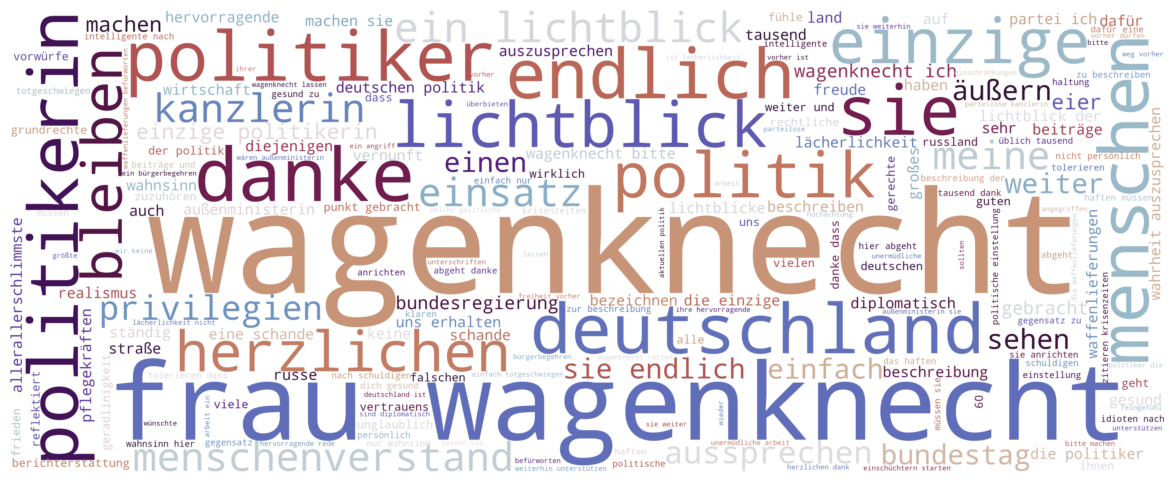

In [55]:
plt.figure(figsize=(15, 6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()